# Exercises for Lecture 2

In [54]:
import numpy as np

from math import comb

from matplotlib import pyplot as plt

## Exercise 2M1
Recall the globe tossing model from the chapter. Compute and plot the 
grid approximate posterior distribution for each of the following sets of observations.
In each case, assume a uniform prior for $p$.
1. W, W, W
2. W, W, W, L
3. L, W, W, L, W, W, W

In [12]:
def simulate_globe_tossing(
    num_tosses: int, p_water: float = 0.5
) -> list:
    """Simulate globe tossing.

    A `p_water` proportion of the globe is covered by water,
    while the rest (`1 - p_water`) is covered by land.
    The simulation produces a `num_tosses`-long sequence of samples
    drawn from a binomial distribution with parameter `p_water`.

    Parameters
    ----------
    num_tosses : int
        Number of tosses of the globe
    p_water : float
        Proportion of the globe covered by water (used as the parameter
        for the binomial distribution).

    Returns
    -------
    list
        A list with the resulting samples, e.g. ['W', 'W', 'L']

    """
    rng = np.random.default_rng(1)
    samples = rng.choice(
        ["W", "L"], num_tosses, replace=True, p=[p_water, 1 - p_water]
    )
    return samples

In [24]:
assert np.array(
    [i == "L" for i in simulate_globe_tossing(10, p_water=0)]
).all()
assert np.array(
    [i == "W" for i in simulate_globe_tossing(10, p_water=1)]
).all()

In [57]:
def posterior(
    data: str,
    grid_resolution: int = 10,
    prior: np.ndarray | None = None,
) -> list:
    
    if prior is not None:
        if len(prior) != grid_resolution:
            raise ValueError(
                "the length of the prior must be equal to the grid_resolution"
            )
    else:  # assume a uniform prior
        prior = np.ones(grid_resolution)
    
    possible_ps = np.linspace(0, 1, grid_resolution)
    n = len(data)
    nW = len(data.replace("L", ""))
    nL = n - nW
    likelihood = comb(n, nW) * (possible_ps**nW) * (1 - possible_ps)**nL
    updated_likelihood = prior * likelihood
    return possible_ps, (updated_likelihood / updated_likelihood.sum())



In [62]:
data_samples = [
    "WWW",
    "WWWL",
    "LWWLWWW"
]

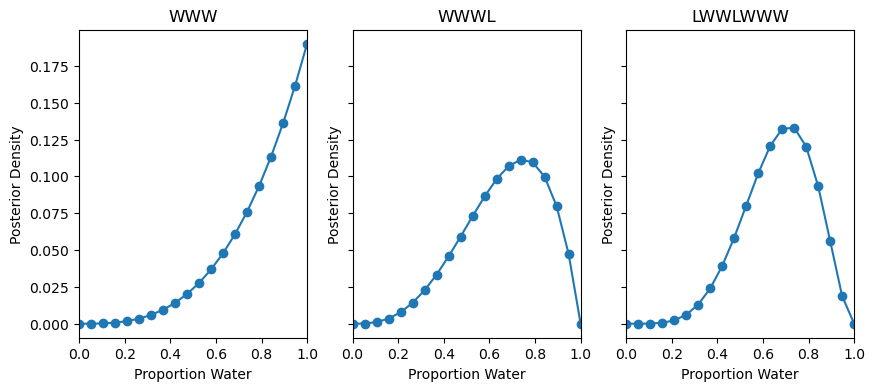

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)

for i, data in enumerate(data_samples):
    axi = ax[i]
    x, y = posterior(data, 20)
    axi.plot(x, y, 'o-')
    axi.set_xlim([0, 1])
    axi.set_title(data)
    axi.set_xlabel("Proportion Water")
    axi.set_ylabel("Posterior Density")


<BarContainer object of 5 artists>

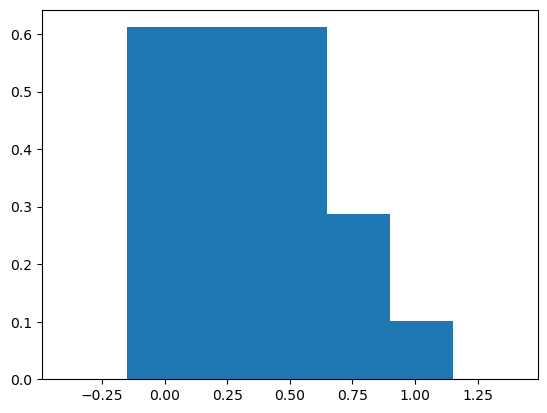

In [47]:
plt.bar(x, y)